In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    label_dict = {}
    label = 0
    for subdir in os.listdir(folder):
        subpath = os.path.join(folder, subdir)
        if os.path.isdir(subpath):
            label_dict[subdir] = label
            for file in os.listdir(subpath):
                img_path = os.path.join(subpath, file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
            label += 1
    return np.array(images), np.array(labels), label_dict

In [3]:
dataset_path = r"C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train"

In [4]:
images, labels, label_dict = load_images_from_folder(dataset_path)

In [5]:
images = images.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [10]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(label_dict), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [13]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2, 1.0],
    fill_mode='nearest'
)


In [14]:
datagen.fit(X_train)

In [15]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
4/4 [==============================] - 6s 1s/step - loss: 2.8892 - accuracy: 0.0849 - val_loss: 2.7301 - val_accuracy: 0.0833
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 2.7932 - accuracy: 0.0849 - val_loss: 2.6736 - val_accuracy: 0.0833
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 2.6442 - accuracy: 0.1038 - val_loss: 2.6208 - val_accuracy: 0.0833
Epoch 4/100
4/4 [==============================] - 5s 2s/step - loss: 2.5379 - accuracy: 0.0849 - val_loss: 2.6403 - val_accuracy: 0.1667
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: 2.5784 - accuracy: 0.1132 - val_loss: 2.6473 - val_accuracy: 0.0833
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 2.5847 - accuracy: 0.0660 - val_loss: 2.6578 - val_accuracy: 0.0833
Epoch 7/100
4/4 [==============================] - 6s 1s/step - loss: 2.5497 - accuracy: 0.0755 - val_loss: 2.6698 - val_accuracy: 0.0833
Epoch 8/100
4/4 [=================

4/4 [==============================] - 5s 1s/step - loss: 2.5616 - accuracy: 0.1132 - val_loss: 2.6648 - val_accuracy: 0.0000e+00
Epoch 60/100
4/4 [==============================] - 6s 2s/step - loss: 2.5255 - accuracy: 0.1132 - val_loss: 2.6632 - val_accuracy: 0.0000e+00
Epoch 61/100
4/4 [==============================] - 6s 2s/step - loss: 2.5255 - accuracy: 0.0566 - val_loss: 2.6663 - val_accuracy: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 5s 1s/step - loss: 2.5265 - accuracy: 0.0849 - val_loss: 2.6638 - val_accuracy: 0.0000e+00
Epoch 63/100
4/4 [==============================] - 6s 1s/step - loss: 2.5365 - accuracy: 0.1321 - val_loss: 2.6639 - val_accuracy: 0.0000e+00
Epoch 64/100
4/4 [==============================] - 6s 1s/step - loss: 2.5309 - accuracy: 0.0849 - val_loss: 2.6634 - val_accuracy: 0.0000e+00
Epoch 65/100
4/4 [==============================] - 5s 2s/step - loss: 2.5489 - accuracy: 0.1132 - val_loss: 2.6635 - val_accuracy: 0.0000e+00
Epoch 66/100

In [16]:
model.save('face_similar_model_vgg16.h5')

In [17]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [18]:
def get_embedding(model, image):
    feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=-3).output)
    return feature_extractor.predict(image)[0]

In [19]:
def load_dataset_embeddings(dataset_path, model):
    embeddings = []
    image_paths = []
    for person in os.listdir(dataset_path):
        person_dir = os.path.join(dataset_path, person)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image = preprocess_image(img_path)
                embedding = get_embedding(model, image)
                embeddings.append(embedding)
                image_paths.append(img_path)
    return np.array(embeddings), image_paths

In [20]:
dataset_embeddings, image_paths = load_dataset_embeddings(dataset_path, model)

1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 157ms/step


In [133]:
input_image_path = r"C:\Users\hites\Downloads\celeba_hq_256\17354.jpg"

In [134]:
input_image = preprocess_image(input_image_path)
input_embedding = get_embedding(model, input_image)

1/1 [==============================] - 0s 431ms/step


In [135]:
similarities = cosine_similarity([input_embedding], dataset_embeddings)[0]
sorted_indices = np.argsort(similarities)[::-1]
sorted_similarities = similarities[sorted_indices]
sorted_image_paths = np.array(image_paths)[sorted_indices]

Image: C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train\sp\img4.png, Similarity: 78.77%


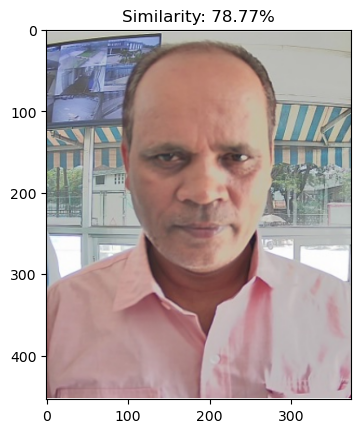

Image: C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train\sp\img3.png, Similarity: 78.77%


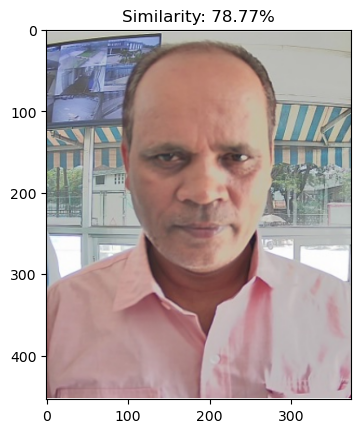

Image: C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train\sp\img5.png, Similarity: 78.77%


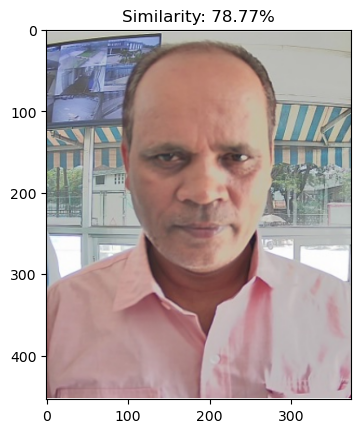

Image: C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train\sp\img2.png, Similarity: 78.77%


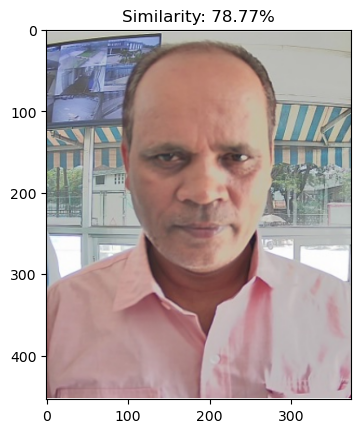

Image: C:\Users\hites\Desktop\Code_Data\Task\Face\Similarity\dataset\train\sp\img1.png, Similarity: 78.77%


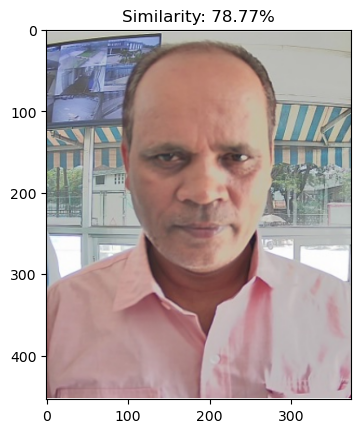

In [136]:
N = 5  
for i in range(N):
    print(f"Image: {sorted_image_paths[i]}, Similarity: {sorted_similarities[i] * 100:.2f}%")
    similar_image = cv2.imread(sorted_image_paths[i])
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)
    plt.imshow(similar_image)
    plt.title(f"Similarity: {sorted_similarities[i] * 100:.2f}%")
    plt.show()

In [137]:
pip install --upgrade opencv-python

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hites\\AppData\\Local\\Temp\\pip-uninstall-bk5mgyrd\\cv2.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 38.8/38.8 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [138]:
import cv2